In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Churn_Modeling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## To make sure the data is clean

### we look at missing values and data types.

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



### Statistical Summary

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1440x1440 with 0 Axes>

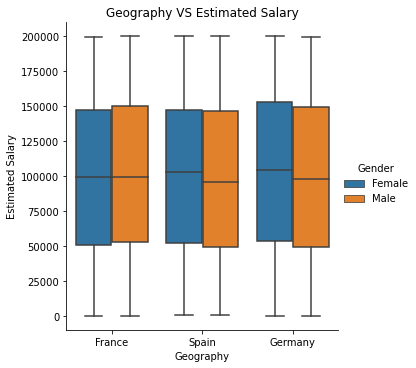

In [9]:
plt.figure(figsize=(20,20))
sns.catplot(x = "Geography", y = "EstimatedSalary", hue = "Gender", kind = "box", data = df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")
plt.show()

###### When we look at the gender and geographic distribution of estimated salary, we see that male customer estimated average salary is higher than females in France and Spain, however in Germany female customers’ estimated average salary is higher.

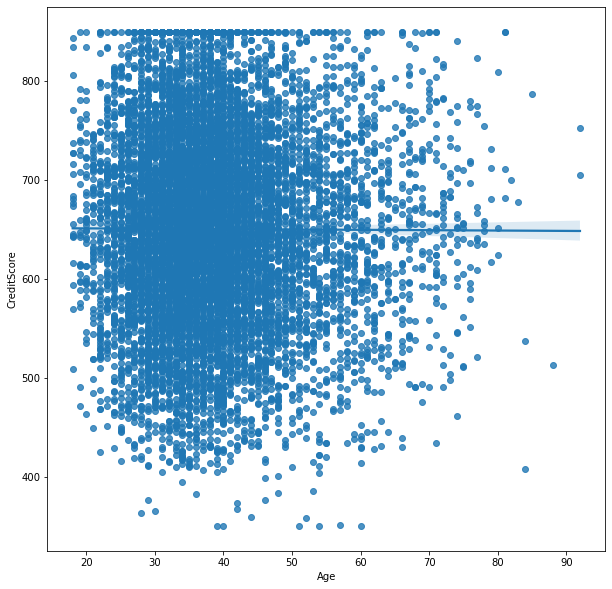

In [10]:
plt.figure(figsize=(10,10))
sns.regplot(x="Age", y="CreditScore", data=df)
plt.show()

#### When we look at the relationship between age and credit score, the linear relationship is very weak in order to clearly define correlation.

### Selecting and Preparing the Feature Set and Target

In [11]:
X = df[["CreditScore", "Geography", "Gender", "Age", "Tenure", "EstimatedSalary"]].values

In [12]:
y=df[["Exited"]]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


### preprocessing categorical variables

- We have to make sure we update the categorical variables to numerical variables as the machine learning techniques we will apply requires all customers attributes to be numerical.

In [13]:
from sklearn import preprocessing

In [14]:
X[:,1]

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

In [15]:
geography=preprocessing.LabelEncoder()
geography.fit(["France", "Spain", "Germany"])
X[:,1]=geography.transform(X[:,1])

In [16]:
X

array([[619, 0, 'Female', 42, 2, 101348.88],
       [608, 2, 'Female', 41, 1, 112542.58],
       [502, 0, 'Female', 42, 8, 113931.57],
       ...,
       [709, 0, 'Female', 36, 7, 42085.58],
       [772, 1, 'Male', 42, 3, 92888.52],
       [792, 0, 'Female', 28, 4, 38190.78]], dtype=object)

In [17]:
gender = preprocessing.LabelEncoder()
gender.fit(["Male","Female"])
X[:,2] = gender.transform(X[:,2])

In [18]:
X

array([[619, 0, 0, 42, 2, 101348.88],
       [608, 2, 0, 41, 1, 112542.58],
       [502, 0, 0, 42, 8, 113931.57],
       ...,
       [709, 0, 0, 36, 7, 42085.58],
       [772, 1, 1, 42, 3, 92888.52],
       [792, 0, 0, 28, 4, 38190.78]], dtype=object)

### Spliting data into training and testing data set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

### Create model using DecisionTree Classifier and fit training data

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()
model.fit(X_trainset, y_trainset)

DecisionTreeClassifier()

### Let's predict

In [23]:
X_testset[0:5]

array([[704, 0, 1, 39, 2, 199484.96],
       [641, 0, 1, 35, 5, 93148.93],
       [555, 1, 0, 46, 4, 177719.88],
       [474, 1, 0, 34, 9, 160213.27],
       [610, 0, 1, 40, 0, 62232.6]], dtype=object)

In [24]:
y_testset[0:5]

,Exited
5876,0
6555,0
1448,1
3351,0
231,0


In [25]:
pred = model.predict(X_testset)
pred[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [26]:
model.predict([[0,0,0,0,0,0]])

array([1], dtype=int64)

In [27]:
model.predict([[619, 0, 0, 42, 2, 101348.88]])

array([0], dtype=int64)

### Evaluating the prediction model

In [28]:
from sklearn import metrics
metrics.accuracy_score(y_testset, pred)

0.719

###  Create Random Forest Decision Tree model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
r_model = RandomForestClassifier()

In [31]:
r_model.fit(X_trainset, y_trainset)

C:\Users\MEERZA~1\AppData\Local\Temp/ipykernel_26348/1930748263.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_model.fit(X_trainset, y_trainset)


RandomForestClassifier()

### Let's predict

In [32]:
r_pred = r_model.predict(X_testset)
r_pred[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

### Evaluating the prediction model

In [33]:
metrics.accuracy_score(y_testset, r_pred)

0.8115

### Conclusion of two model
- Based on the metrics evaluations, 73% of the predictions would be accurate with the Decision Classifier Model
- While 81% of the predictions would be accurate with the RandomForestClassifier. 
- We would prefer to use Random Forest in this case.

In [34]:
df = pd.read_csv("Tele_Churn.csv")

In [35]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [37]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [40]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [44]:
for c in df.columns.values.tolist():
    print(c)
    print(df[c].unique())
    print("")

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243 

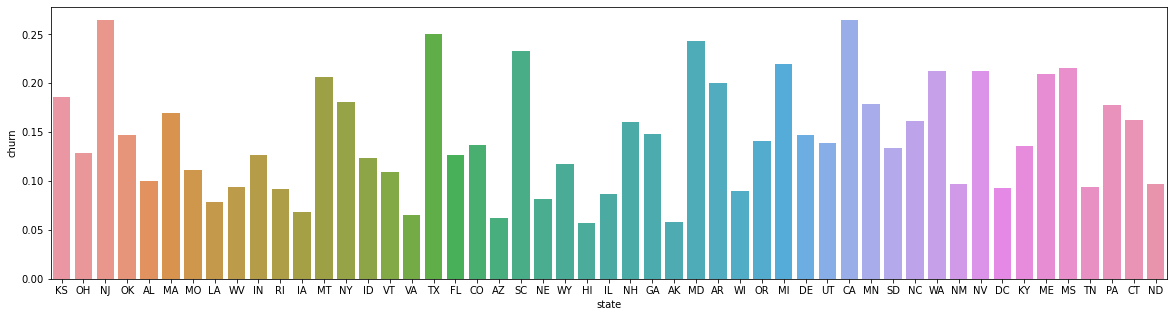

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(x = df["state"], y =  df["churn"], ci = None)
plt.show()

### When we look at the state and churn we see that California and New Jersey are the top to states with the highest churn rate.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


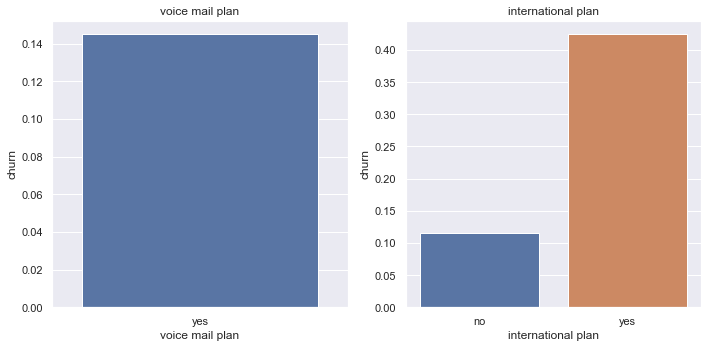

In [94]:
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.barplot(x=df["voice mail plan"], y = df["churn"], ax=axes[0], ci = None)
axes[0].set_title("voice mail plan")
sns.barplot(df["international plan"], y=df["churn"], ax=axes[1], ci = None)
axes[1].set_title("international plan")
plt.tight_layout()
plt.show()

### The churn rate is higher with the international plan customers and lower with the customers that have voice mail plan.

In [98]:
len(df[df["churn"] == True])

483

In [99]:
len(df[df["churn"] == False])

2850

### There are much more customers that are staying with the company than leaving the company as a customer.

0       1
1       1
2       0
3       2
4       3
       ..
3328    2
3329    3
3330    2
3331    2
3332    0
Name: customer service calls, Length: 3333, dtype: int64

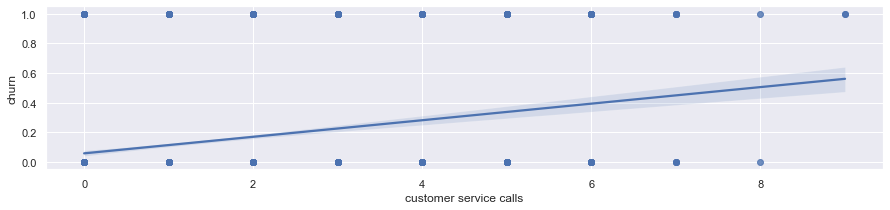

In [113]:
plt.figure(figsize=(15,3))
sns.regplot(x = df["customer service calls"], y = df["churn"])
plt.show()

### Feature and Target Selection

In [120]:
#Feature Selection
X = df[["account length", "international plan", "total day charge", "total night charge", "total intl charge", "customer service calls", "state"]]
#Target Selection
y = df["churn"]
# review feature set
X[0:5]

,account length,international plan,total day charge,total night charge,total intl charge,customer service calls,state
0,128,no,45.07,11.01,2.70,1,KS
1,107,no,27.47,11.45,3.70,1,OH
2,137,no,41.38,7.32,3.29,0,NJ
3,84,yes,50.90,8.86,1.78,2,OH
4,75,yes,28.34,8.41,2.73,3,OK


In [121]:
# review target set
y[0:5]

0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

### Pre-Processing

In [118]:
from sklearn.preprocessing import LabelEncoder

In [123]:
# update state with one hot coding
X=pd.get_dummies(X, columns=["state"])

In [124]:
X=X.values

In [125]:
X

array([[128, 'no', 45.07, ..., 0, 0, 0],
       [107, 'no', 27.47, ..., 0, 0, 0],
       [137, 'no', 41.38, ..., 0, 0, 0],
       ...,
       [28, 'no', 30.74, ..., 0, 0, 0],
       [184, 'yes', 36.35, ..., 0, 0, 0],
       [74, 'no', 39.85, ..., 0, 0, 0]], dtype=object)

In [127]:
int_plan = LabelEncoder()
int_plan.fit(["yes","no"])
X[:,1] = int_plan.transform(X[:,1])

In [128]:
X

array([[128, 0, 45.07, ..., 0, 0, 0],
       [107, 0, 27.47, ..., 0, 0, 0],
       [137, 0, 41.38, ..., 0, 0, 0],
       ...,
       [28, 0, 30.74, ..., 0, 0, 0],
       [184, 1, 36.35, ..., 0, 0, 0],
       [74, 0, 39.85, ..., 0, 0, 0]], dtype=object)

### Splitting into training and testing set

In [129]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y, test_size=0.2, random_state=3)

### Creating model using random forest classifier and fit the training set

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
R_model = RandomForestClassifier(n_estimators=100)
R_model.fit(X_trainset, y_trainset)

RandomForestClassifier()

#### Create prediction using the model


In [154]:
R_pred = R_model.predict(X_testset)
R_pred[0:5]

array([False,  True, False, False, False])

#### Looking at the accuracy score (using two methods)

In [155]:
from sklearn import metrics
R_model.score(X_testset, y_testset)
metrics.accuracy_score(y_testset, R_pred)

0.896551724137931

#### Confusion matrics to find precision and recall

In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, R_pred)

array([[557,  16],
       [ 53,  41]], dtype=int64)

#### The model predicts 557 True Negatives, 16 False Positives, 53 False Negatives, 41 True Positives.

In [157]:
# Looking at the precision score
from sklearn.metrics import precision_score
precision_score(y_testset, R_pred)

0.7192982456140351

In [158]:
# Looking at the recall score
from sklearn.metrics import recall_score
recall_score(y_testset, R_pred)

0.43617021276595747

In [159]:
# find probability for each prediction
prob=R_model.predict_proba(X_testset)[:,1]

In [160]:
prob

array([0.06, 0.67, 0.04, 0.02, 0.02, 0.16, 0.2 , 0.  , 0.03, 0.06, 0.08,
       0.03, 0.07, 0.23, 0.06, 0.08, 0.14, 0.15, 0.12, 0.02, 0.05, 0.05,
       0.06, 0.03, 0.05, 0.08, 0.19, 0.1 , 0.16, 0.09, 0.02, 0.03, 0.04,
       0.03, 0.12, 0.04, 0.06, 0.05, 0.03, 0.05, 0.06, 0.05, 0.05, 0.  ,
       0.  , 0.04, 0.62, 0.  , 0.06, 0.64, 0.15, 0.  , 0.04, 0.02, 0.07,
       0.07, 0.56, 0.07, 0.15, 0.16, 0.  , 0.01, 0.59, 0.76, 0.28, 0.09,
       0.12, 0.  , 0.22, 0.01, 0.17, 0.14, 0.01, 0.34, 0.01, 0.14, 0.07,
       0.01, 0.02, 0.21, 0.  , 0.01, 0.11, 0.06, 0.46, 0.02, 0.06, 0.2 ,
       0.08, 0.01, 0.03, 0.03, 0.07, 0.09, 0.03, 0.01, 0.32, 0.03, 0.07,
       0.07, 0.2 , 0.74, 0.07, 0.01, 0.  , 0.1 , 0.01, 0.11, 0.  , 0.3 ,
       0.29, 0.69, 0.05, 0.06, 0.14, 0.12, 0.  , 0.08, 0.  , 0.02, 0.43,
       0.16, 0.04, 0.07, 0.  , 0.  , 0.25, 0.01, 0.28, 0.29, 0.09, 0.74,
       0.4 , 0.02, 0.54, 0.  , 0.01, 0.03, 0.04, 0.57, 0.07, 0.03, 0.11,
       0.81, 0.36, 0.05, 0.01, 0.02, 0.07, 0.06, 0.

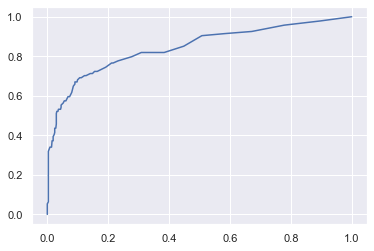

In [161]:
# look at ROC curve, which gives us the false and true positive predictions
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_testset, prob)
plt.plot(fpr, tpr)
plt.show()

In [162]:
# Looking at the area under the curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_testset, prob)
auc

0.843665292785266

In [163]:
#looking at the f1_score
from sklearn.metrics import f1_score
f1_score(y_testset, R_pred)

0.543046357615894

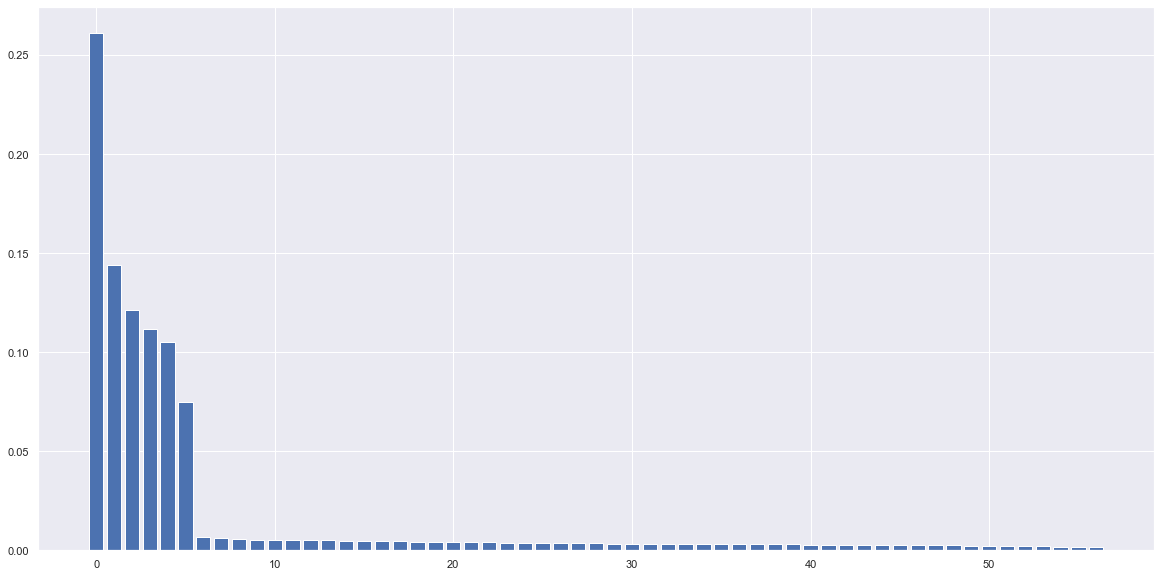

In [164]:
# looking at the importance of each feature
importances=R_model.feature_importances_

# visualize to see the feature importance
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(20,10))
plt.bar(range(X.shape[1]), importances[indices])
plt.show()

### Based on the feature importance, we can definitely remove state from our model.

### Let's Create another model Support Vector Machine (SVM). 

In [165]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_trainset, y_trainset)

SVC(probability=True)

In [166]:
svc_model.score(X_testset, y_testset)

0.8590704647676162

In [168]:
svc_pred = svc_model.predict(X_testset)

In [169]:
# Look at the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, svc_pred)

array([[573,   0],
       [ 94,   0]], dtype=int64)

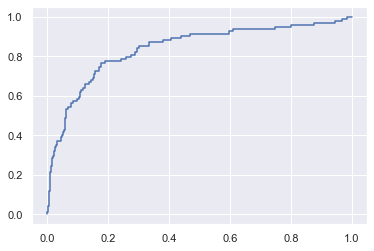

In [172]:
# probability for each prediction
prob_2=svc_model.predict_proba(X_testset)[:,1]
# look at ROC curve
fpr, tpr, thresholds=roc_curve(y_testset, prob_2)
plt.plot(fpr, tpr)

In [173]:
# area under the curve
auc=roc_auc_score(y_testset, prob)
auc

0.843665292785266